# **Análise de Dados de Taxa de suicídios entre os anos de 1985 e 2016**

As análises de dados apresentadas abaixo foram ensinadas e apresentadas pelo professor/youtuber Carlos Melo (https://www.youtube.com/watch?v=vN3upvFYwJ0) onde é possível analisar as taxas de suicídio no Brasil nos últimos anos.

Escolhi utilizar essa análise apresentada pelo Carlos como uma forma de aprender e aplicar os metódos de análise utilizando python e suas bibliotecas.

Além disso, fui capaz de continuar a análise começada por ele como forma de prosseguir com os estudos.


---




O tema "suicídio" tem ganhado mais atenção devido ao Setembro amarelo, que é uma campanha brasileira de prevenção ao suicídio.
Como vai ser possível observar, a campanha é extremamente necessária devido ao aumento de casos nos útlimos anos.

---

Os dados utilizados para esse estudo foram coletados no seguinte Dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

De acordo com o professor, esse Dataset é o mais completo sobre o assunto no momento.

In [52]:
#importar pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [53]:
#importando dados do CSV
df = pd.read_csv("https://raw.githubusercontent.com/keziacamposcs/SetembroAmarelo/main/master.csv")

In [54]:
#Ver Formato do DataFrame
print("Formato do DataFrame: ", df.shape)


#Ver as 5 primeiras entradas do dataset
df.head()

Formato do DataFrame:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# **Brasil e Suicídios**

Abaixo é possível visualizar alguns dados relacionados a número de suicídios no Brasil com relação ao ano, sexo, média de suicídios por n° de habitantes, IDH, Renda per Capita e etc.

In [55]:
#Extrair dados apenas relacionados ao Brasil
df_brasil = df[df.country ==  "Brazil"].copy()

#Ver o formato do Dataframe em relação ao Brasil
print("Formato do DataFrame: ", df_brasil.shape)

#Exibir as 5 primeiras entradas do novo Dataframe
df_brasil.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


Em seguida é possível analisar a média de suicídios no Brasil em comparação com o restante do mundo. Com isso, também observa-se um pequeno aumento de suicídios no Brasil nos últimos anos em comparação com o restante do Mundo que diminiu.

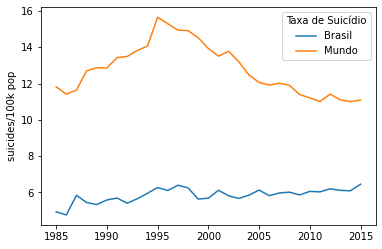

In [56]:
#Pegando a media mundial e a do Brasil em suicídos 
years = df_brasil.year.unique() #anos -> eixo X
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

#desconsiderando 2016 pois nem todos os países tem dados nesse ano
suicides_world_mean.drop(2016, inplace=True)

#plotar lineplor comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de Suicídio")
plt.show()

### **Faixa etária com maior índice de suícidio**


De acordo com a faixa etária observada a seguir, além de perceber o aumento de vítimas, é possível observar também que a sua maioria possui idades de 35 até 54 anos.

In [57]:
#criando uma tabela dinâmica
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

#reordenando as tabelas
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

#ver as 5 primeiras entradas da pivot table
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


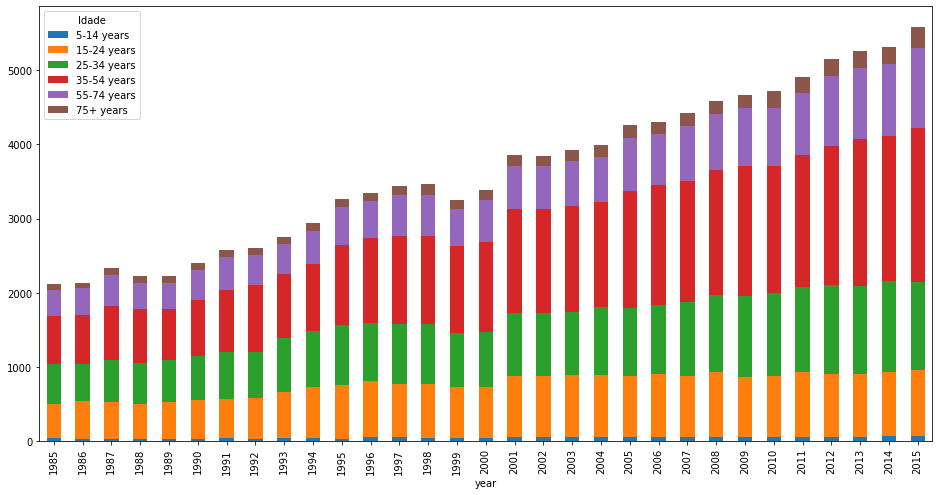

In [58]:
#plotar a pivot table das faixas etárias
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

In [59]:
#Estatística de suicídios por faixa etária
table[['25-34 years']].loc[2015]
table.loc[2015] / table.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

### **Comparação entre Homens e Mulheres**




Além da faixa etária, com os dados é possível analisar que a maiora das vítimas de suicídio são **homens**:

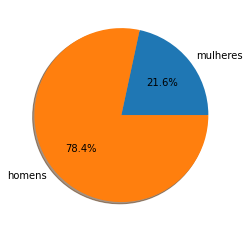

In [60]:
#extraindo valores entre homens e mulheres
homens_mulheres = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

#plotando o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

### **Correlação entre PIB, IDH e os números de suicídios**


Através de uma matriz de correlação e pltando um heatmap, observa-se que o aumento no PIB per capita não diminuiu o número de suicídios por 100 mil habitantes. 

Quanto ao IDH, por haver falta de valores na fonte, pode acabar dando uma interpretação incorreta ou com viés.

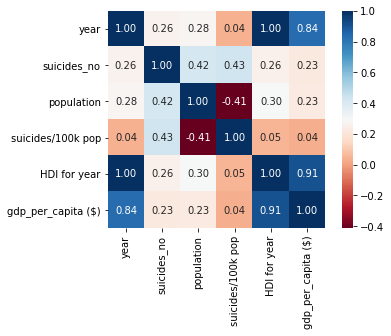

In [61]:
#plotando heatmap
corr = df_brasil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Continuação...**

O Japão é conhecido mundialmente como o país com mais casos de sucídios no mundo.

Dessa forma, seus dados vão ser usados como material e por fim comparado com o Brasil.

In [62]:
#Extrair dados apenas relacionados ao Japão
df_japao = df[df.country ==  "Japan"].copy()

#Ver o formato do Dataframe em relação ao Japão
print("Formato do DataFrame: ", df_japao.shape)

#Exibir as 5 primeiras entradas do novo Dataframe
df_japao.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
13364,Japan,1985,male,75+ years,1340,1791000,74.82,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13365,Japan,1985,female,75+ years,1553,2862400,54.26,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13366,Japan,1985,male,55-74 years,3763,8996900,41.83,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13367,Japan,1985,male,35-54 years,6962,17833300,39.04,Japan1985,0.791,"1,398,892,744,821",12401,Silent
13368,Japan,1985,male,25-34 years,1982,8465800,23.41,Japan1985,0.791,"1,398,892,744,821",12401,Boomers


Comparando o Japão com o Brasil, através do gráfico, mesmo tendo menores taxas nos últimos anos, o país continua com grande diferença de suicídios ao comparados com o Brasil.

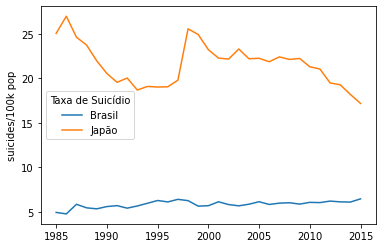

In [63]:
#Pegando a media mundial e a do Brasil em suicídos 
years = df_brasil.year.unique() #anos -> eixo X
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_japao_mean = df_japao.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

#desconsiderando 2016 pois nem todos os países tem dados nesse ano
suicides_world_mean.drop(2016, inplace=True)

#plotar lineplor comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_japao_mean, label='Japão')
plt.legend(title="Taxa de Suicídio")
plt.show()

Como é possível observar, ainda nos últimos anos, as taxas de suicídios no Japão possuem uma grande diferença com as do Brasil.

### **Taxas de sucídio Brasil x Japão em relação a idades**

In [93]:
#criando uma tabela dinâmica
table_japao = pd.pivot_table(df_japao, values='suicides_no', index=['year'], columns=['age'])

#reordenando as tabelas
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table_japao = table_japao.reindex(column_order, axis=1)

#ver as 5 primeiras entradas da pivot table
table_japao.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,42.5,815.0,1399.5,4772.0,3153.0,1446.5
1986,63.0,971.5,1496.5,5042.5,3524.0,1644.5
1987,34.5,817.0,1343.0,4592.0,3463.0,1582.0
1988,39.5,778.0,1228.5,4262.5,3352.0,1677.5
1989,31.5,703.5,1153.5,3733.5,3231.0,1653.5


Já uma diferença entre o Japão e o Brasil é a idade. 
No Japão, os casos de suicídio acontece em sua maioria com pessoas entre 55-74 anos.

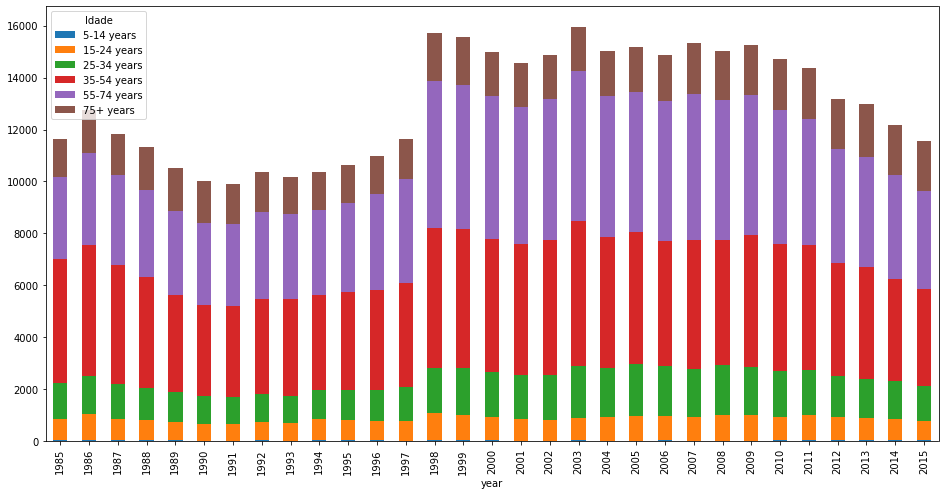

In [94]:
#plotar a pivot table das faixas etárias
table_japao.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");



---



In [66]:
#Estatística de suicídios por faixa etária
table_japao[['25-34 years']].loc[2015]
table_japao.loc[2015] / table.loc[2015].sum()

age
5-14 years     0.003897
15-24 years    0.064914
25-34 years    0.114022
35-54 years    0.326130
55-74 years    0.326217
75+ years      0.164819
Name: 2015, dtype: float64

### **Comparação entre Homens e Mulheres no Japão**



Outro ponto interessante a se observar é a relação com o sexo. No Japão mais mulheres cometem suicídio em comparação com o Brasil.

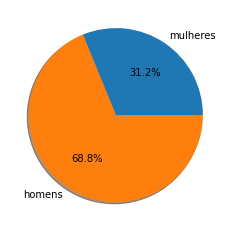

In [67]:
#extraindo valores entre homens e mulheres
homens_mulheres_japao = df_japao.groupby('sex').suicides_no.sum() / df_japao.groupby('sex').suicides_no.sum().sum()

#plotando o gráfico de pizza
plt.pie(homens_mulheres_japao, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

# **Contradição**

Apesar do Japão ser o país mais conhecido pelos grandes números de casos de suicídio, ao analisar o Dataset é possível ver que o país que possui mais suicídios é a **Rússia**.

Em terceiro lugar estaria então o Japão.

In [68]:
#criando uma tabela dinâmica
df_world = df.groupby('country')['suicides_no'].mean()

print(df_world.sort_values())

#Exibir as 5 primeiras entradas do novo Dataframe
#df_world.head()

country
Saint Kitts and Nevis       0.000000
Dominica                    0.000000
Antigua and Barbuda         0.033951
San Marino                  0.111111
Grenada                     0.122581
                            ...     
Germany                   933.532051
Ukraine                   952.232143
Japan                    2169.091398
United States            2779.604839
Russian Federation       3733.771605
Name: suicides_no, Length: 101, dtype: float64


Logo, analisando a Rússia em seguida:

In [104]:
#Extrair dados apenas relacionados ao Rússia
df_russia =df[df.country ==  "Russian Federation"].copy()

#Ver o formato do Dataframe em relação ao Rússia
print("Formato do DataFrame: ", df_russia.shape)

#Exibir as 5 primeiras entradas do novo Dataframe
df_russia.head()



Formato do DataFrame:  (324, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,Russian Federation1989,NaN,"506,500,173,960",3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,Russian Federation1989,NaN,"506,500,173,960",3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation


A tabela acima apresenta os 5 primeiros anos que se possui registro dos casos de suicídio na Rússia. Como é possível analisar, ao contrário de alguns países, somente se possui os dados a partir dos anos de **1989**.

O curioso é que em 1989, a então Rússia ainda era URSS e naquele ano aconteceu a queda do comunismo a nível mundial: Fim da União Soviética como superpotência mundial e a sua dissolução, que levou ao fim da Guerra Fria.

### **Comparando com o Mundo e a Rússia:**

In [105]:
#criando uma tabela dinâmica
table_russia = pd.pivot_table(df_russia, values='suicides_no', index=['year'], columns=['age'])

#reordenando as tabelas
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table_russia = table_russia.reindex(column_order, axis=1)

#ver as 5 primeiras entradas da pivot table
table_russia.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1989,155.5,1604.5,3841.5,7178.0,4646.0,1535.0
1990,156.0,1757.5,3889.0,7492.0,4732.5,1487.0
1991,181.5,1813.0,3894.5,7587.5,4746.0,1418.0
1992,197.0,2075.5,4474.0,9296.0,5573.5,1345.5
1993,215.0,2566.0,5241.0,11709.5,6775.5,1416.0


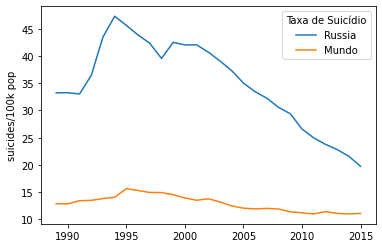

In [114]:
#Pegando a media mundial e a do Russia em suicídos 
years = df_russia.year.unique() #anos -> eixo X
suicides_russia_mean = df_russia.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

#desconsiderando 2016 pois nem todos os países tem dados nesse ano
suicides_world_mean.drop(2016, inplace=True)
suicides_world_mean.drop(1985, inplace=True)
suicides_world_mean.drop(1986, inplace=True)
suicides_world_mean.drop(1987, inplace=True)
suicides_world_mean.drop(1988, inplace=True)


#plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_russia_mean, label='Russia')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de Suicídio")
plt.show()

Ao analisar o gráfico em relação aos anos que possuímos os dados, é em 1994 que há o maior pico de casos de suicídios na Rússia.

Por fim, como é possível observar, a Rússia possuía altos casos de suicídio em comparação com o restante dos países.

In [112]:
#criando uma tabela dinâmica
table_russia = pd.pivot_table(df_russia, values='suicides_no', index=['year'], columns=['age'])

#reordenando as tabelas
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table_russia = table_russia.reindex(column_order, axis=1)

#ver as 5 primeiras entradas da pivot table
table_russia.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1989,155.5,1604.5,3841.5,7178.0,4646.0,1535.0
1990,156.0,1757.5,3889.0,7492.0,4732.5,1487.0
1991,181.5,1813.0,3894.5,7587.5,4746.0,1418.0
1992,197.0,2075.5,4474.0,9296.0,5573.5,1345.5
1993,215.0,2566.0,5241.0,11709.5,6775.5,1416.0


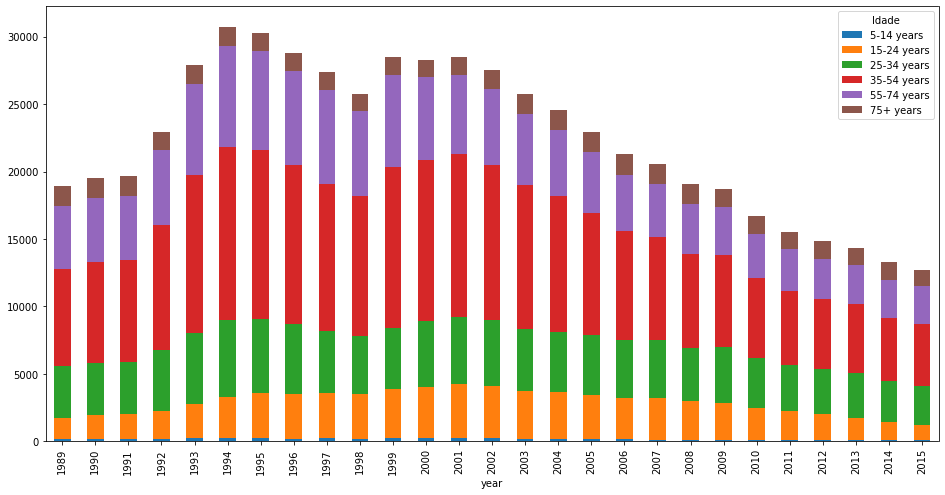

In [113]:
#plotar a pivot table das faixas etárias
table_russia.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

A maior parte dos suicídios na Rússia acontecia entre pessoas de 35-54 anos, semelhante ao Brasil.

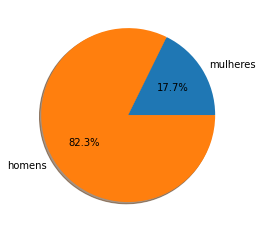

In [115]:
#extraindo valores entre homens e mulheres
homens_mulheres_russia = df_russia.groupby('sex').suicides_no.sum() / df_japao.groupby('sex').suicides_no.sum().sum()

#plotando o gráfico de pizza
plt.pie(homens_mulheres_russia, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

E a média de suicídios cometidos também possui a sua maiora Homens.